## Final Project Submission

Please fill out: 
* Student name:     KARIMI JAMES MBETI
* Student pace:     FULL TIME
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## MICROSOFT'S NEW MOVIE STUDIO ANALYSIS

Everyone loves a good movie! From animated classics to franchise action movies, movies appeal to many different groups of people and offer wonderful escapes from reality.

We therefore want to figure out what exactly makes a movie a “success”, through analysis so that we can narrow down to some common factors in successful movies. 

This will in turn be of key value in making strategic decisions for our studio regarding production and financing.

#### The Optimal Genres?

All this movies getting produced comprise of different genres ranging from action, comedy, drama,etc, just to name a few.

We've colllected data from various platforms to analyze and find out the best performing genres at the box office which we can in turn incorporate them into our new movie studio decison making process for the best performing film genres which we can create. 

#### ANALYSIS

I will be performing an analysis on over 2,500 movies. The data includes different information concerning the movies ranging from the title, genres, averagerating, e.t.c

I will be analyzing the dataset to determine what contributes to the "success" of a movie. In this analysis I will define analysis in financial terms basing the success of a movie on the amount of money it earns in comparison to the budget.

We will find out what succesful movies have in common. The analysis will be done through examination of charts done through python.

### DATA

In [1]:
#importing necessary packages to use them in loading our data
import pandas as pd
import sqlite3
import numpy as np

In [2]:
#loading bom movie dataset into a dataframe
bom_movie = pd.read_csv("/home/james/phase1_project/dsc-phase-1-project-v2-4/zippedData/bom.movie_gross.csv")
bom_movie.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
#loading movie budgets dataset into a dataframe
tn_mv_budget = pd.read_csv("/home/james/phase1_project/dsc-phase-1-project-v2-4/zippedData/tn.movie_budgets.csv")
tn_mv_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [4]:
#connecting to the im.db database into a dataframe
conn = sqlite3.connect("/home/james/phase1_project/dsc-phase-1-project-v2-4/zippedData/im.db")
#reading data from the tables movie_basics and movie_ratings
im_movies = pd.read_sql("""
SELECT *
FROM movie_basics
JOIN movie_ratings
    USING(movie_id);
""", conn)
im_movies.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


### DATA PREPARATION

The data is from different places and so we want to combine all this data to one dataset so that we can have all the fields that we want in one place.

In [5]:
#joining tn_mv_budget and im_movies datasets based on the movie titles
movies = im_movies.set_index("primary_title").join(tn_mv_budget.set_index("movie"),
                                                   how="inner")
movies.head()

,movie_id,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross
#Horror,tt3526286,#Horror,2015,101.0,"Crime,Drama,Horror",3.0,3092,16,"Nov 20, 2015","$1,500,000",$0,$0
10 Cloverfield Lane,tt1179933,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",7.2,260383,54,"Mar 11, 2016","$5,000,000","$72,082,999","$108,286,422"
10 Days in a Madhouse,tt3453052,10 Days in a Madhouse,2015,111.0,Drama,6.7,1114,48,"Nov 11, 2015","$12,000,000","$14,616","$14,616"
12 Rounds,tt3517850,12 Rounds,2017,NaN,"Action,Drama,Romance",8.1,11,37,"Mar 27, 2009","$20,000,000","$12,234,694","$17,306,648"
12 Strong,tt1413492,12 Strong,2018,130.0,"Action,Drama,History",6.6,50155,64,"Jan 19, 2018","$35,000,000","$45,819,713","$71,118,378"


The main challenge was that the movies in both datasets were at times represented in different ordering of names so reducing our overall dataset to 2875 rows.

Next I will be dropping columns that i feel aren't relevant to this study.

In [6]:
#dropping columns
cols_to_remove = ["id", "runtime_minutes", "start_year", "original_title"]
movies = movies.drop(cols_to_remove, axis=1)

In [7]:
movies.index.name = "movie"
movies.reset_index(inplace=True)
movies.head()

,movie,movie_id,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross
0,#Horror,tt3526286,"Crime,Drama,Horror",3.0,3092,"Nov 20, 2015","$1,500,000",$0,$0
1,10 Cloverfield Lane,tt1179933,"Drama,Horror,Mystery",7.2,260383,"Mar 11, 2016","$5,000,000","$72,082,999","$108,286,422"
2,10 Days in a Madhouse,tt3453052,Drama,6.7,1114,"Nov 11, 2015","$12,000,000","$14,616","$14,616"
3,12 Rounds,tt3517850,"Action,Drama,Romance",8.1,11,"Mar 27, 2009","$20,000,000","$12,234,694","$17,306,648"
4,12 Strong,tt1413492,"Action,Drama,History",6.6,50155,"Jan 19, 2018","$35,000,000","$45,819,713","$71,118,378"


Now we have our dataset (movies) consisting of 2875 rows.

### DATA CLEANING

In [8]:
#we'll first check to see a summary of our data to get a feel of our data
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2875 entries, 0 to 2874
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              2875 non-null   object 
 1   movie_id           2875 non-null   object 
 2   genres             2867 non-null   object 
 3   averagerating      2875 non-null   float64
 4   numvotes           2875 non-null   int64  
 5   release_date       2875 non-null   object 
 6   production_budget  2875 non-null   object 
 7   domestic_gross     2875 non-null   object 
 8   worldwide_gross    2875 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 202.3+ KB


From our data we can observe some of the qualities of our data with some to be fixed like;
* production budget, domestic_gross and worldwide_gross are of type objects but we need to change them to type integer for mathematical operations as they represent the budget and income.
* Also from the preview of our data we saw that the budgets are objects represented by "$" a dollar sign which we also need to remove it.
* The release date is an object wich we want it as dates.
* In genres there are missing values. In this scenario it would be best to drop them as only 8 values missing which wouldn't affect our dataset much and also it would be a challenge to replace them as they are categorical.

In [9]:
#dropping rows with missing values
movies.dropna(inplace=True)

In [10]:
#converting budget columns to an Integer data type
movies.iloc[:,6:] = movies.iloc[:,6:].applymap(lambda x: int(x.replace(",", "").strip("$")))
movies.head()

,movie,movie_id,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross
0,#Horror,tt3526286,"Crime,Drama,Horror",3.0,3092,"Nov 20, 2015",1500000,0,0
1,10 Cloverfield Lane,tt1179933,"Drama,Horror,Mystery",7.2,260383,"Mar 11, 2016",5000000,72082999,108286422
2,10 Days in a Madhouse,tt3453052,Drama,6.7,1114,"Nov 11, 2015",12000000,14616,14616
3,12 Rounds,tt3517850,"Action,Drama,Romance",8.1,11,"Mar 27, 2009",20000000,12234694,17306648
4,12 Strong,tt1413492,"Action,Drama,History",6.6,50155,"Jan 19, 2018",35000000,45819713,71118378


In [11]:
#Converting release_date to Dates
movies.loc[:, "release_date"] = pd.to_datetime(movies.loc[:, "release_date"])

In [12]:
#checking for duplicates in our dataset
set(list(movies.duplicated(subset="movie_id")))

{False, True}

From the output above we can see that there are duplicates and we need to get rid of them.

In [13]:
#Dropping duplicates
movies.drop_duplicates(subset="movie_id", inplace=True)

In [14]:
#checking the number of rows left after dropping the duplicated rows
len(movies)

2745

We've cleaned our data and now we have a dataset with information about 2745 movies which we can perform analysis on.

### DATA ANALYSIS / VISUALIZATION

In [15]:
#Importing libraries necessary for visualizations
import matplotlib.pyplot as plt

In our analysis a succesful movie will be based on whether it made twice as much money as the budget in the worldwide gross which combines the total domestic and foreign income.

In [16]:
#retrieving succesful movies from our dataset
success_movies = movies.loc[((movies.worldwide_gross // movies.production_budget) >= 2)]
success_movies.head()

,movie,movie_id,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross
1,10 Cloverfield Lane,tt1179933,"Drama,Horror,Mystery",7.2,260383,2016-03-11,5000000,72082999,108286422
4,12 Strong,tt1413492,"Action,Drama,History",6.6,50155,2018-01-19,35000000,45819713,71118378
5,12 Years a Slave,tt2024544,"Biography,Drama,History",8.1,577301,2013-10-18,20000000,56671993,181025343
6,127 Hours,tt1542344,"Adventure,Biography,Drama",7.6,323949,2010-11-05,18000000,18335230,60217171
9,2 Guns,tt1272878,"Action,Comedy,Crime",6.7,182025,2013-08-02,61000000,75612460,132493015


we will then order our data by the most succesful in terms of the income ratio between worldwide_gross and budget

In [17]:
#getting a ratio which will be used in ordering our data
success_movies["income_ratio"] = round(movies.worldwide_gross / movies.production_budget)
success_movies.head()

<ipython-input-17-1e6a80fe1ee0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  success_movies["income_ratio"] = round(movies.worldwide_gross / movies.production_budget)


,movie,movie_id,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,income_ratio
1,10 Cloverfield Lane,tt1179933,"Drama,Horror,Mystery",7.2,260383,2016-03-11,5000000,72082999,108286422,22.0
4,12 Strong,tt1413492,"Action,Drama,History",6.6,50155,2018-01-19,35000000,45819713,71118378,2.0
5,12 Years a Slave,tt2024544,"Biography,Drama,History",8.1,577301,2013-10-18,20000000,56671993,181025343,9.0
6,127 Hours,tt1542344,"Adventure,Biography,Drama",7.6,323949,2010-11-05,18000000,18335230,60217171,3.0
9,2 Guns,tt1272878,"Action,Comedy,Crime",6.7,182025,2013-08-02,61000000,75612460,132493015,2.0


In [18]:
#ordering our data
success_movies = success_movies.sort_values("income_ratio", ascending=False)
success_movies.head()

,movie,movie_id,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,income_ratio
2195,The Gallows,tt2309260,"Horror,Mystery,Thriller",4.2,17763,2015-07-10,100000,22764410,41656474,417.0
233,Bambi,tt2668120,"Biography,Documentary",7.0,101,1942-08-13,858000,102797000,268000000,312.0
1743,Rocky,tt9430578,"Action,Drama,Romance",6.4,5,1976-11-21,1000000,117235147,225000000,225.0
1742,Rocky,tt3080284,"Action,Comedy,Drama",6.1,46,1976-11-21,1000000,117235147,225000000,225.0
2136,The Devil Inside,tt1560985,Horror,4.2,33522,2012-01-06,1000000,53262945,101759490,102.0


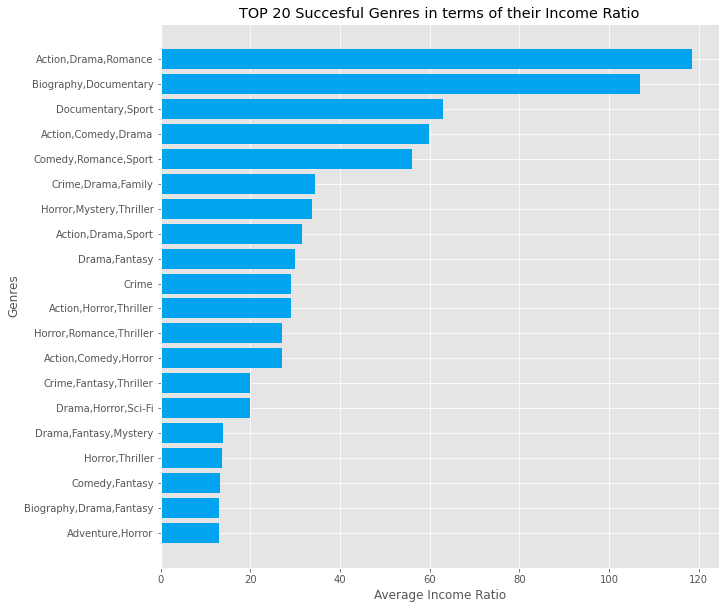

In [19]:
#A plot of the top 20 most succesful genres in terms of income ratio
genres_income = success_movies.groupby("genres")["income_ratio"].mean().sort_values()[-20:]

plt.style.use("ggplot")
fig, ax = plt.subplots(figsize = (10,10))

ax.barh(genres_income.index, genres_income.values, color = "#00A4EF")

ax.set(xlabel = "Average Income Ratio", ylabel = "Genres", 
       title = "TOP 20 Succesful Genres in terms of their Income Ratio");

* From the above plot we can see the top 20 most succesful genres.

* the combination of genres; ACTION, DRAMA, ROMANCE had the most in average income ratio

We want to find out the specific genres which are common in the succesful movies and the top 100 movies to see a similarity between the two.

In [20]:
#finding most common genres in succesful movies.
success_genres = []
for genre in list(success_movies.genres):
    success_genres.extend(genre.split(","))

success_genres = pd.Series(success_genres).value_counts().sort_values()

#top 5 genres
top_5_sg = success_genres[-5:]

In [21]:
#Finding the Most common genres in the TOP 100 most succesful movies
genres = list(success_movies.genres)[:100]
income_ratio = list(success_movies.income_ratio.astype(int))[:100]

top_100_genres = []
for gen in genres:
    top_100_genres.extend(gen.split(","))
top_100_genres = pd.Series(top_100_genres).value_counts().sort_values()

#top 5 genres
top_5_g = top_100_genres[-5:]

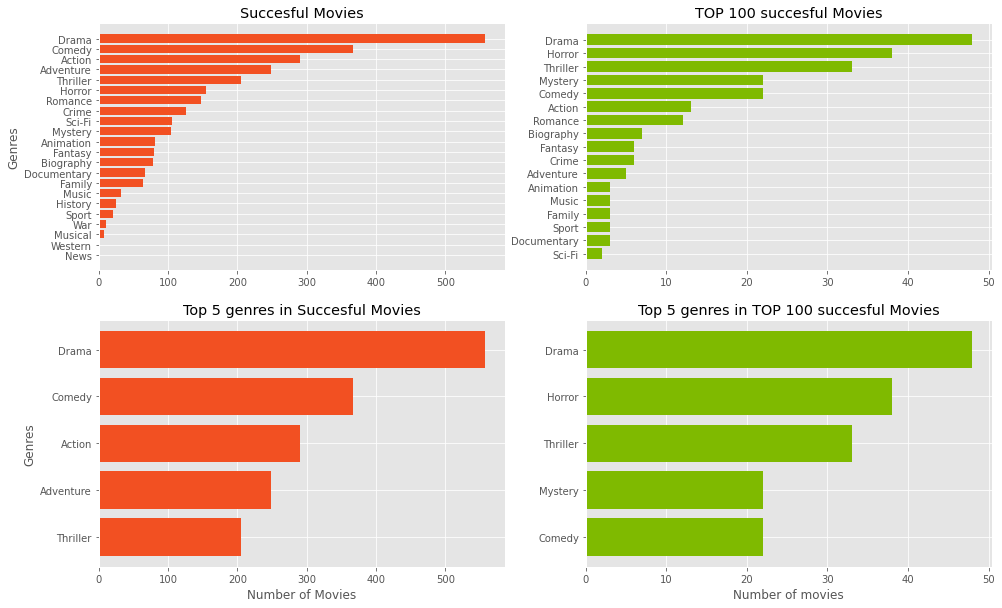

In [22]:
#plotting most common genres in Top 100 and in all succesful movies
fig, ([ax1,ax2],[ax3,ax4]) = plt.subplots(figsize=(16,10), ncols=2, nrows=2)

ax1.barh(success_genres.index, success_genres.values, color = "#F25022")
ax2.barh(top_100_genres.index, top_100_genres.values, color = "#7FBA00")
ax3.barh(top_5_sg.index, top_5_sg.values, color = "#F25022")
ax4.barh(top_5_g.index, top_5_g.values, color = "#7FBA00")

ax1.set(ylabel = "Genres",
          title = "Succesful Movies")
ax2.set(title = "TOP 100 succesful Movies")

ax3.set(xlabel = "Number of Movies", ylabel = "Genres",
          title = "Top 5 genres in Succesful Movies")
ax4.set(xlabel = "Number of movies",
          title = "Top 5 genres in TOP 100 succesful Movies");

* with the above diagrams we can tell that the Genre Drama is most common in most succesful movies as it appears most in the succesful movies and moreso in the TOP 100.

* Also from the diagrams we can see that genres; drama, thriller, comedy appear in both graphs which brings a trend in the genres common in succesful movies.

In our next analysis we want to find out if there is any relationship between the ratings and the income generated per movie.

But first we'll look at the distribution of the votes per movie and the relationship between the averagerating to look at whether the number of votes affect the averagerating and also see whether there is a standard number for votes per movie.

In [23]:
#Calculating the mean, median, standard deviation, number of votes
print("mean: ", success_movies.numvotes.mean())
print("median: ", success_movies.numvotes.median())
print("standard dev: ", success_movies.numvotes.std())

mean:  123205.98137171888
median:  55841.0
standard dev:  182927.41918090844


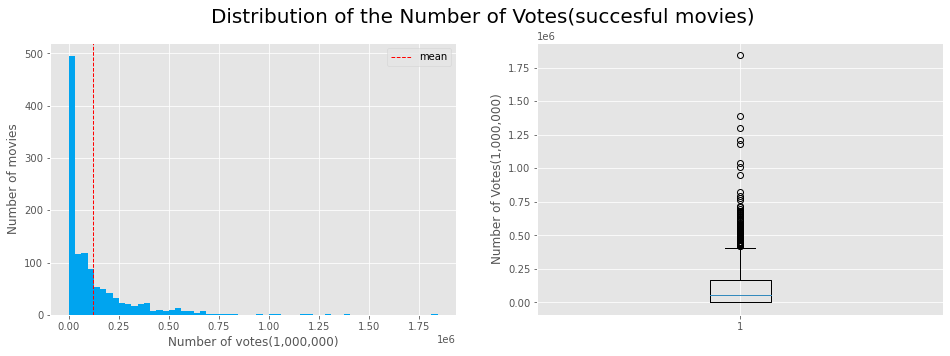

In [24]:
#Distribution of the number of votes.
fig, ax = plt.subplots(figsize = (16,5), ncols=2)

ax[0].hist(success_movies.numvotes, bins="auto", color= "#00A4EF")
ax[1].boxplot(success_movies.numvotes)

ax[0].axvline(success_movies.numvotes.mean(), c = "red", lw = 1, ls = "--")
ax[0].set(xlabel = "Number of votes(1,000,000)", ylabel = "Number of movies")
ax[1].set(ylabel = "Number of Votes(1,000,000)")

ax[0].legend(["mean"])

fig.suptitle("Distribution of the Number of Votes(succesful movies)", fontsize = 20);


* The data from the number of votes is skewed as we can see that majority of succesful movies have less than 100,000 votes with the average number votes being 123,205 votes.

* There is a very huge variance in the number of votes (182,927 votes) due to the very many outliers above 400,000 votes.

* This tells us that there is no standard number of votes required for the averagerating.

Next let's see whether there is a relationship between the number of votes and the average rating.

In [25]:
#correlation  between number of votes and averagerating
np.corrcoef(success_movies.averagerating, success_movies.numvotes)[0][1]

0.40698705498247845

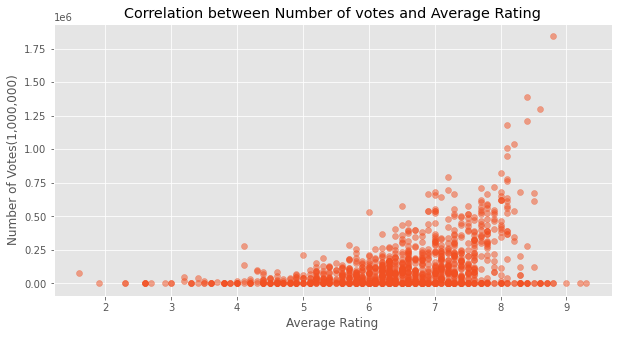

In [26]:
#plotting a scatter matrix to display the relationship
fig, ax = plt.subplots(figsize = (10,5))

ax.scatter(success_movies.averagerating, success_movies.numvotes, color = "#F25022",
           alpha=0.5)
ax.set(xlabel = "Average Rating", ylabel = "Number of Votes(1,000,000)",
       title = "Correlation between Number of votes and Average Rating");

* There is a correlation coefficient of 0.407 which indicates a low positive correlation.
* There is a low positive correlation between this two. We can see that the number of votes slightly affect the average rating.

* From the observations we can tell that there is no standard required number of votes but also we've noticed that a higher number of votes tend to have a slight effect on a high average rating.

Next, we want to see if there is a correlation between the average rating and the income ratio;

In [27]:
#Correlation between the Average rating and the income ratio
np.corrcoef(success_movies.averagerating, success_movies.income_ratio)[0][1]

-0.06308060064254174

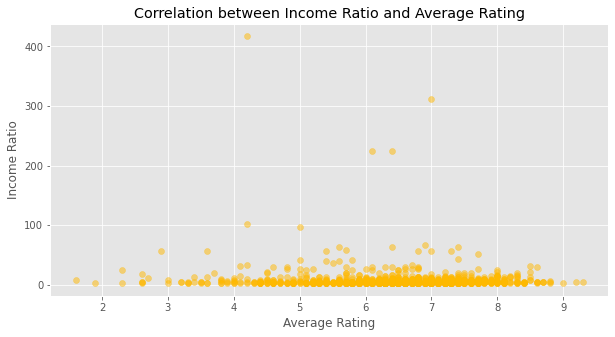

In [28]:
fig, ax = plt.subplots(figsize = (10,5))

ax.scatter(success_movies.averagerating, success_movies.income_ratio, color = "#FFB900",
           alpha=0.5)
ax.set(xlabel = "Average Rating", ylabel = "Income Ratio",
       title = "Correlation between Income Ratio and Average Rating");

* The correlation (-0.06308) is very close to 0 and we can conclude that there is no correlation

* From the observation we can tell that there is no correlation between the average rating and the income ratio.

* This means that the average rating doesn't affect the success of a movie in terms of the income generated

We now want to see the months in which the movies were released and which had a better average income ratio.

In [29]:
#Selecting the month release_dates and the average income ratio per month
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

months_income = pysqldf("""
                        SELECT AVG(income_ratio) avg_incomeRatio,
                               strftime("%m", release_date) release_months
                        FROM success_movies
                        GROUP BY release_months
                        ORDER BY avg_incomeRatio DESC
                        """)
months_income.head()

,avg_incomeRatio,release_months
0,11.382353,07
1,11.295455,01
2,10.309735,11
3,9.071429,08
4,8.080000,10


In [30]:
#Converting to months' names
months_names = {"01": "JAN", "02": "FEB", "03": "MAR", "04": "APR", "05": "MAY",
                "06": "JUN", "07": "JUL", "08": "AUG", "09": "SEP", "10": "OCT",
                "11": "NOV", "12": "DEC"}

months_income.release_months = months_income.release_months.map(months_names)
months_income.head()

,avg_incomeRatio,release_months
0,11.382353,JUL
1,11.295455,JAN
2,10.309735,NOV
3,9.071429,AUG
4,8.080000,OCT


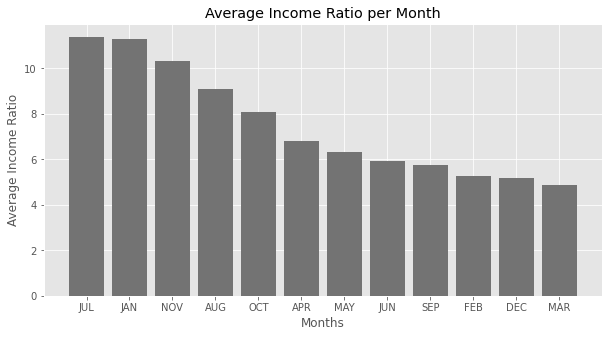

In [31]:
#plotting a bargraph to showcase the months and their average income ratio
fig, ax = plt.subplots(figsize = (10,5))

ax.bar(months_income.release_months, months_income.avg_incomeRatio, color = "#737373")
ax.set(xlabel = "Months", ylabel = "Average Income Ratio",
       title = "Average Income Ratio per Month");

* From the analysis we've found out that the best months to release a movie considering the average income ratio, are July, January and November

Next we want to see if the budget allocation of a movie have an effect on the income ratio and also to find out the average production budget in succesful movies.

In [32]:
#Calculating the mean, median, standard deviation
print("mean: ", success_movies.production_budget.mean())
print("median: ", success_movies.production_budget.median())
print("standard dev: ", success_movies.production_budget.std())

mean:  47264845.39034716
median:  24000000.0
standard dev:  58520039.88573575


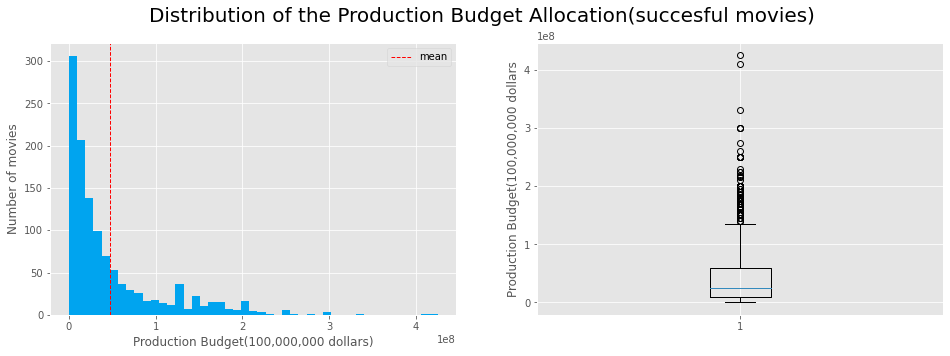

In [33]:
#Plotting the distribution of production budget
fig, ax = plt.subplots(figsize = (16,5), ncols=2)

ax[0].hist(success_movies.production_budget, bins="auto", color= "#00A4EF")
ax[1].boxplot(success_movies.production_budget)

ax[0].axvline(success_movies.production_budget.mean(), c = "red", lw = 1, ls = "--")
ax[0].set(xlabel = "Production Budget(100,000,000 dollars)", ylabel = "Number of movies")
ax[1].set(ylabel = "Production Budget(100,000,000 dollars")

ax[0].legend(["mean"])

fig.suptitle("Distribution of the Production Budget Allocation(succesful movies)", fontsize = 20);

* The data is skewed due to some budget allocations of over 100,000,000 hence pulling the mean upwards.

* From our findings we can see that the average spending for a succesful movie is around 47,300,000 with most movies being less than 30,000,000

* With the median we can tell that a spending within 24,000,000 would be good for a succesful movie.

In [34]:
#Finding the correlation between production budget and income ratio
np.corrcoef(success_movies.production_budget, success_movies.income_ratio)[0][1]

-0.12976794248893767

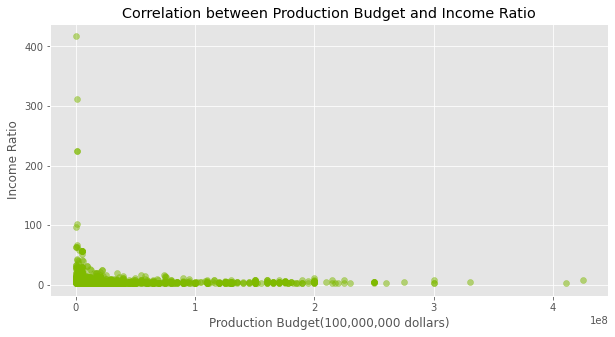

In [35]:
#plotting a scatter matrix to display the relationship
fig, ax = plt.subplots(figsize = (10,5))

ax.scatter(success_movies.production_budget, success_movies.income_ratio, color = "#7FBA00",
           alpha=0.5)
ax.set(xlabel = "Production Budget(100,000,000 dollars)", ylabel = "Income Ratio",
       title = "Correlation between Production Budget and Income Ratio");


* The correlation coefficient (-0.1298) indicates a low negative correlation.

* This means a slight inverse relationship and therefore the more the production budget the lesser the income ratio.

We want to further investigate the average budget allocations of the movies that contains our top three genres which are Drama, Comedy and Thriller.

In [36]:
#getting movies with our top three genres and their average spending
drama_avg = success_movies.loc[success_movies.genres.str.contains("Drama")]["production_budget"].mean()
thriller_avg = success_movies.loc[success_movies.genres.str.contains("Thriller")]["production_budget"].mean()
comedy_avg = success_movies.loc[success_movies.genres.str.contains("Comedy")]["production_budget"].mean()

print("Drama Average Budget: ", drama_avg)
print("Thriller Average Budget: ", thriller_avg)
print("Comedy Average Budget: ", comedy_avg)


Drama Average Budget:  27591243.100358423
Thriller Average Budget:  36764757.56097561
Comedy Average Budget:  43876321.52588556


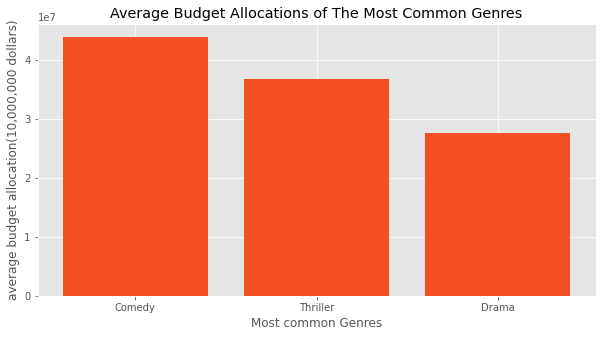

In [37]:
#Plotting a bar graph to represent average budgets of our top three genres
data = [comedy_avg, thriller_avg, drama_avg] 
labels = ["Comedy", "Thriller", "Drama"]

fig, ax = plt.subplots(figsize = (10,5))

ax.bar(labels, data, color = "#F25022")
ax.set(xlabel = "Most common Genres", 
       ylabel = "average budget allocation(10,000,000 dollars)", 
       title = "Average Budget Allocations of The Most Common Genres");

* We can tell that comedy is the most expensive to produce whereas Drama is cheaper to produce.

### RECOMMENDATIONS 

1) With the findings I highly recommend three film genres which include: **_DRAMA, THRILLER and COMEDY_** which appeared to be the most common genres in succesful movies. **DRAMA** with the highest priority as it is cheaper to produce and has a high income ratio. 
* There are still other genres *_Action, adventure, horror, mystery_* which also did well and could also be worth taking note of.

* Overall the genre combination: **(Action, Drama, Romance)** topped with being the highest in terms of income ratio.

* It's also worth noting that genres **(Biography, Documentary) and (Documentary, Sport)** aren't that common but they  were among the best in terms of income ratio


2) The sucess of a movie also highly depends on the release month. I'd also want to recommend three months which proved best in terms of the income generated. They include: **_JULY, JANUARY and NOVEMBER_** with **JULY** having the highest income ratio.

3) I would recommend a budget allocation **within 24 million dollars** which proved to be a good allocation for a successful movie considering the inverse relationship between the budget and the income ratio.
